# `Segundo Bloque`

Interpolación, splines y una segunda mirada al cálculo numérico.
- El problema a resolver.
- Interpolación.
    - Interpolación polinomial
        - Base monomial
        - Interpolación de Lagrange
        - Interpolación polinomial de Newton
        - Interpolación cúbica-Spline
- Comparación con `SciPy`

## El problema a resolver

En muchas ocasiones nos enfrentamos a situaciones donde no tenemos una expresión analítica, sino valores discretos que describen cierto comportamiento. Usualmente estos valores discretos no están equiespaciados siendo necesario ''conocer'' en muchas ocasiones el valor correspondiente a un punto no reportado. En estos casos se puede proceder por dos vías, realizar una INTERPOLACIÓN de los datos, o realizar un FITTING a un modelo teórico.

<center><img src="capturas/126.png"></center>

En esta clase nos centraremos en el primero de ellos, la `INTERPOLACIÓN`.

Básicamente, el objetivo del presente aproximar una función $f(x)$ mediante un conjunto de $n$ funciones básicas $\phi_k(x)$ que, combinado con un conjunto de $n$ parámetros indeterminados $c_k\; (k = 0, 1,..., n − 1)$ se utiliza para producir los datos. Matematicamente tendremos que:
$$
p(x)=\sum_{k=0}^{n-1}c_k \phi_k(x)
$$
donde $p(x)$ representa la aproximación de la función desconocida y las funciones $\phi_k(x)$ son linealmente independientes.


## Interpolation

Supongamos que tenemos un conjunto de datos $x_i$ independiente y $y_i$ dependientes, con $i=1, 2, ...$. Nos gustaría encontrar una función de estimación $y(x)$ tal que $y(x_i)=y_i$ para cada punto de nuestro conjunto de datos. Esto significa que la función de estimación pasa por nuestros puntos de datos. Dado un nuevo $x_{new}$ podemos **interpolar** su valor usando $y(x_{new})$. En este contexto,  $y(x)$ se llama función de interpolación. La siguiente figura muestra el enunciado del problema de interpolación.
<center><img src="capturas/fig1.png"></center>

La interpolación no requiere que el usuario tenga un modelo subyacente para los datos, especialmente cuando hay muchos puntos de datos confiables. Sin embargo, los procesos que subyacen a los datos deben informar al usuario sobre la calidad de la interpolación. Por ejemplo, nuestros datos pueden consistir en coordenadas (x,y) de un automóvil a lo largo del tiempo. Dado que el movimiento está restringido a la física de maniobra del automóvil, podemos esperar que los puntos entre las coordenadas (x,y) en nuestro conjunto sean “suaves” en lugar de irregulares.

**En otras palabras**

La interpolación surge cuando tenemos como entrada una conjunto de datos, $(x_j, y_j)$ para $j = 0, 1,. . . , n − 1$, que suponemos representa exactamente la $f(x)$ subyacente. Se definirán las funciones base $\phi_k(x)$ y se intentará determinar los $n$ parámetros $c_k$. NOTAR como tenemos $n$ incógnitas y $n$ puntos de datos, por lo que podemos determinar todos los parámetros desconocidos exigiendo que nuestra función de aproximación $p(x)$ pase exactamente por los puntos de datos de entrada (excepto por el error de redondeo), es decir:
$$
y_j=\sum_{k=0}^{n-1}c_k\phi_k(x_j)
$$
donde se uso que $p(x_j)=y_j$. En forma matricial se tendría que $\Phi C = Y$ 
<center><img src="capturas/127.png"></center>

NÓTESE que una ves definida las funciones $\phi_k$ se puede resolver el sistema de ecuaciones. Como se puede inferir un interpolador de no es único (aunque cada interpolador tiene que pasar por los puntos de datos) ya que depende de cómo se escojan las funciones $\phi_k$. Sin embargo, las funciones escogidas deben cumplir ciertos criterios como suavidad, monotonicidad, etc. Es decir, el interpolante debe comportarse `razonablemente`. En este curso nos centraremos en tres enfoques diferentes para los interpolantes:
- `Interpolación polinomial`: este enfoque, supone que un solo polinomio puede capturar eficiente y efectivamente el comportamiento de la función subyacente. **Ésta es una gran suposición**.
- `Interpolación polinómica por partes`: este enfoque divide los puntos de datos en subintervalos y se emplea un polinomio de bajo grado diferente en cada subintervalo.
- `Interpolación trigonométrica`: este enfoque se utiliza para el caso de datos periódicos. Como veremos será necesario introducir uno de los algoritmos más famosos que existen, la transformada rápida de Fourier.


### Interpolación polinomial

La interpolación polinomial se refiere al caso en el que la función de interpolación $p(x)$ es un polinomio, note que la función subyacente $f(x)$ que está intentando aproximar no tiene por qué ser un polinomio, puede ser cualquier cosa.

#### Base monomial

La elección más simple y natural para las funciones base $φ_k(x)$ es utilizar monomios:
$$φ_k(x)=x^k$$

<center><img src="capturas/128.png"></center>

Usando la elección anterior tendremos que el polinomio de interpolación $p(x)$ toma la forma:
$$
p(x)=c_0 + c_1 x+ c_2 x^2+\dots + c_{n-1} x^{n-1}
$$

La forma más ingenua para encontrar las incógnitas es evaluar el polinomio en los puntos, es decir:
<center><img src="capturas/129.png"></center>

lo que se traduce a:
<center><img src="capturas/130.png"></center>

Esta matriz de coeficientes $n \times n$ (no simétrica) se conoce como matriz de `Vandermonde`. El determinante de una matriz de Vandermonde es distinto de cero para distintos nodos $x_j$; por tanto, una matriz de Vandermonde no es singular. Como resultado, las columnas de la matriz de Vandermonde son linealmente independientes. Esto significa que si emplea operaciones $O(n^3)$ como máximo para encontrar los parámetros $c_k$.

#### Interpolación de Lagrange

La interpolación de Lagrange se introduce en la mayoría de los libros de texto sobre métodos numéricos. Sin embargo, después de algunos comentarios introductorios, el enfoque generalmente se abandona por otros métodos, por ejemplo, la interpolación de Newton (es un caso particular), típicamente después de afirmar que la forma de Lagrange es buena para demostrar teoremas pero no tiene valor práctico. Como veremos, la interpolación de Lagrange es útil tanto formalmente como en la práctica.

Antes de discutir cómo realizar la interpolación, introduzcamos lo que se conoce como puntos cardinales o Lagrange o polinomios fundamentales (lo vimos anteriormente).
$$
L_k(x)=\frac{\prod_{j=0, j\neq k}^{n-1}(x-x_j)}{\prod_{j=0, j\neq k}^{n-1}(x_k-x_j)}, \quad k=0, 1, \dots, n-1
$$

Notar que el denominador solo depende de $x_j$, es decir, de los puntos de interpolación, por lo que es claramente una constante (no depende de x). El numerador es un polinomio en $x$ de grado $n − 1$. El polinomio de Lagrange $L_k(x)$ es $1$ en $x_k$, ya que el numerador y el denominador son iguales entre sí en ese caso y cero para un $k$ dado en $x_j$ cuando $j ≥ k$. Resumiendo
$$
L_k(x_j)=\delta_{kj}.
$$

Veamos unos ejemplos. Independientemente de dónde se coloquen los $x_j$, así es como se ven los tres polinomios de Lagrange para el caso de $n = 3$:
<center><img src="capturas/131.png"></center>

Utilizando los polinomios cardinales como funciones base; es decir $\phi_k(x) = L_k(x)$ tendremos
<center><img src="capturas/132.png"></center>

como se aprecia no necesitamos usar $c_k$ en nuestra definición del polinomio de interpolación, ya que simplemente podemos escribir $y_k$ (los valores y de nuestros datos de entrada) en su lugar. Para ver por qué esto está permitido, examinemos el valor de $p(x)$ en nuestros nodos:
<center><img src="capturas/133.png"></center>

Como se aprecia llegamos a la igualdad $p(x_j) = y_j$, lo cual es la definición de lo que significa ser un polinomio de interpolación. Esto conlleva a no tener que incluir $c_k$ al utilizar polinomios cardinales (que van a $0$ y a $1$ en los lugares correctos) en lugar de monomios. 

`Con este resultado hemos logrado evitar encontrarnos con una matriz de Vandermonde (posiblemente mal condicionada)`, sin embargo, el costo computacional es alto $O(n^2)$ cada vez que se evalua en un punto $x$. Para simplificar este problema se suele utilizar la `fórmula baricentríca de interpolación` (barycentric interpolation formula). 
<center><img src="capturas/134.png"></center>

donde los pesos $w_k$ se definen como
<center><img src="capturas/135.png"></center>

Observe que las dos sumas son casi idénticas: la primera involucra los valores de los datos de entrada $y_k$, mientras que la segunda no. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Implementación:
def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs, datays, ws, x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

In [10]:
# Range función
func = lambda x: 1/(1+25*x**2)

# generando datos ficticios
def generatedata(n, f, nodes="cheb", int=[-1, 1]):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0, np.pi, n))
    else:
        dataxs = np.linspace(int[0], int[1], n) 
    
    datays = f(dataxs)
    return dataxs, datays

In [4]:
dataxs, datays = generatedata(15, func)
ws = weights(dataxs)
x = 0.3
pofx = bary(dataxs, datays, ws, x)

print(x, pofx, func(x))

dataxs, datays = generatedata(30, func)
ws = weights(dataxs)
pofx = bary(dataxs, datays, ws, x)

print(x, pofx, func(x))

0.3 0.2592750581841138 0.3076923076923077
0.3 0.3091978256811317 0.3076923076923077


Como notamos, para $n=15$ la coincidencia no es muy buena, sin embargo para $n=30$ mejoró mucho.

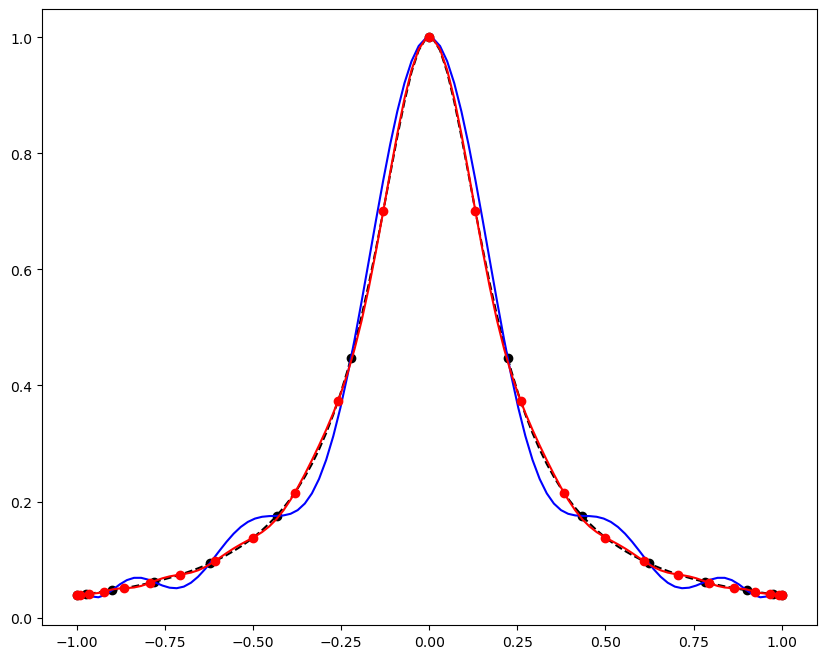

In [5]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 15 datos
dataxs, datays = generatedata(15, func)
ws = weights(dataxs)
daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ko')
plt.plot(x, daty, c='b')

# usando 25 datos
dataxs, datays = generatedata(25, func)
ws = weights(dataxs)
daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

### Interpolación polinomial de Newton

La interpolación polinomial de Newton es otra forma popular de ajustar exactamente un conjunto de datos. La forma general del polinomio de Newton de orden $ n-1 $ que pasa por $ n $ puntos es:

$$ f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_n)$$

que se puede reescribir como:

$$ f(x) = \sum_{i=0}^{n}{a_in_i(x)}$$ 

donde $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

La característica particular del polinomio de Newton es que los coeficientes $ a_i $ pueden determinarse mediante un procedimiento matemático muy simple que los casos anteriores. Por ejemplo, dado que el polinomio debe pasar por cada uno de los datos, $ (x_i, y_i) $, tendremos $ f (x_i) = y_i $, por lo que tendremos

$$f(x_0) = a_0 = y_0$$

y

$$
f(x_1) = a_0 + a_1(x_1-x_0) = y_1,
$$

reorganizándolo para obtener $ a_1 $, tendremos:
$$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

Ahora, inserte los puntos de datos $ (x_2, y_2) $, podemos calcular $ a_2 $, y tiene la forma:
$$a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$

Hagamos un punto de datos más $ (x_3, y_3) $ para calcular $ a_3 $, después de insertar el punto de datos en la ecuación, obtenemos:

$$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2} - \frac{y_2 - y_1}{x_2-x_1}}{x_3 - x_1} - \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0}}{x_3 - x_0}$$


Ahora, ¿ves los patrones? Estos se denominan **diferencias divididas**, si definimos:

$$ f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$ f[x_2, x_1, x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_1}$$

Continuamos escribiendo esto, tendremos la siguiente ecuación de iteración:

$$ f[x_k, x_{k-1}, \dots, x_{1}, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_{2}, x_2] - f[x_{k-1}, x_{k-2}, \dots, x_{1}, x_0]}{x_k-x_0}$$


Podemos ver una belleza del método es que, una vez que se determinan los coeficientes, agregar nuevos puntos de datos no cambiará los calculados, solo necesitamos calcular las diferencias más altas continúa de la misma manera. Todo el procedimiento para encontrar estos coeficientes se puede resumir en una tabla de diferencias divididas. Veamos un ejemplo usando 5 puntos de datos:

$$
\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2, x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3, x_2, x_1,x_0]\\
x_2 & y_2 &             & f[x_3, x_2,x_1] &             & f[x_4, x_3, x_2, x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4, x_3, x_2, x_1]\\
x_3 & y_3 &             & f[x_4, x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}
$$

Cada elemento de la tabla se puede calcular utilizando los dos elementos anteriores (a la izquierda). En realidad, podemos calcular cada elemento y almacenarlos en una matriz diagonal, es decir, la matriz de coeficientes se puede escribir como:

$$
\begin{array}{cccccc}
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

Tenga en cuenta que la primera fila de la matriz son en realidad todos los coeficientes que necesitamos, es decir, $ a_0, a_1, a_2, a_3, a_4 $. Veamos un ejemplo de cómo podemos hacerlo.

#### Ejercicio

Calcula la tabla de diferencias divididas para x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].

In [6]:
def divided_diff(x, y):
    '''
    función para calcular el termino dividido
     tabla de diferencias
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluar el polinomio de newton
     en x 
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

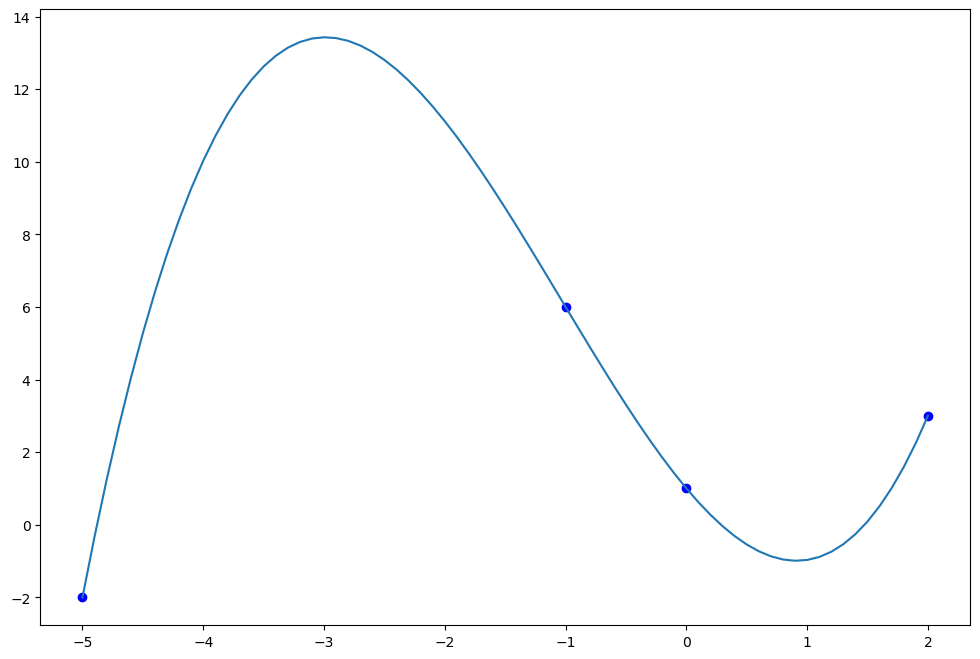

In [7]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# obteniendo los coef
a_s = divided_diff(x, y)[0, :]

# evaluando los nuevos puntos
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

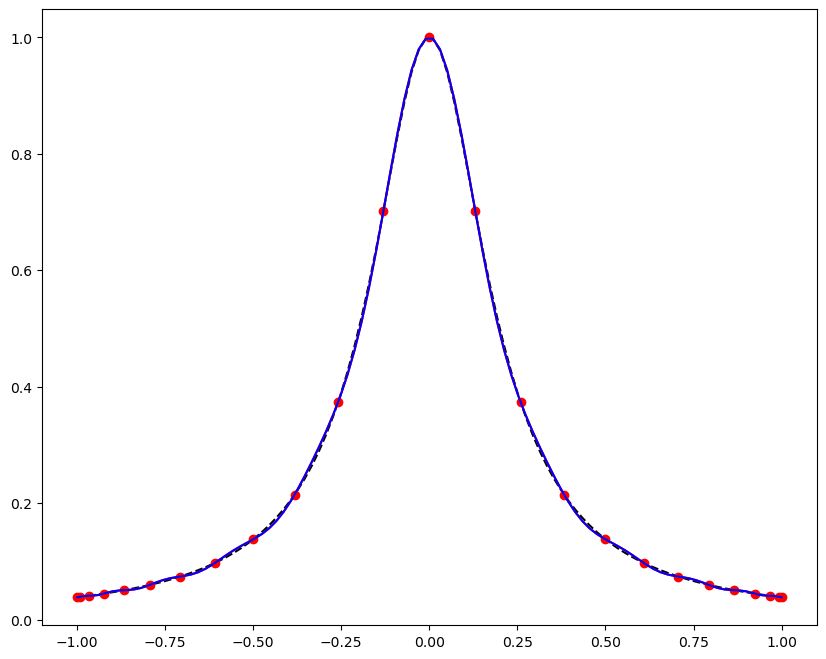

In [8]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 25 datos
dataxs, datays = generatedata(25, func)
ws = weights(dataxs)
a_s = divided_diff(dataxs, datays)[0, :]

daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

y_new = newton_poly(a_s, dataxs, x)
plt.plot(x, y_new, c='b')

(-5.0, 5.0)

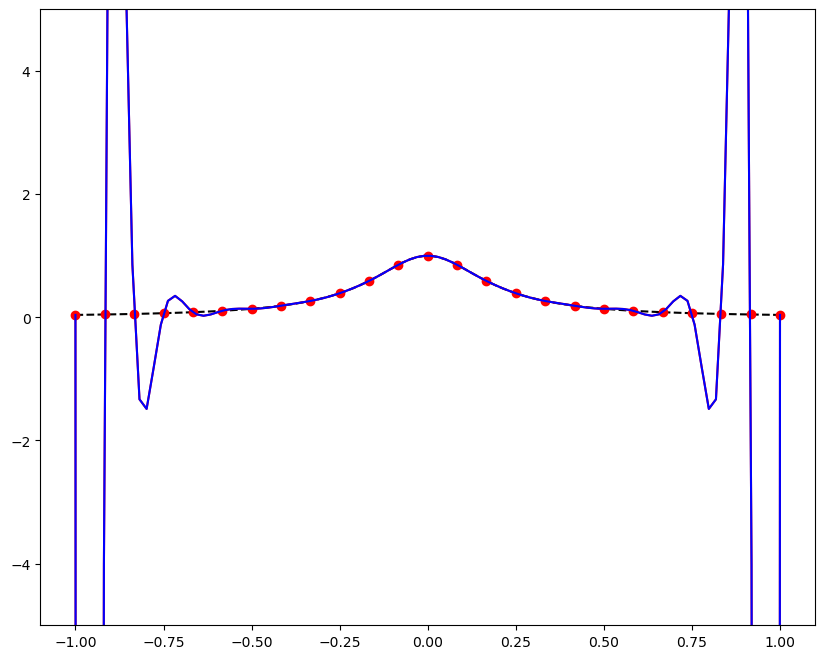

In [10]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 25 datos
dataxs, datays = generatedata(25, func, nodes='none')
ws = weights(dataxs)
a_s = divided_diff(dataxs, datays)[0, :]

daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

y_new = newton_poly(a_s, dataxs, x)
plt.plot(x, y_new, c='b')

plt.ylim(-5, 5)

**¡¡¿Qué pasó arriba?!!**

El polinomio interpolador puede presentar comportamientos patológicos, en el sentido de que, cuando aumentamos el número de puntos de interpolación en un intervalo, la desviación máxima entre el polinomio y la función en dicho intervalo aumente con el grado del polinomio.

En este caso ocurrió al aumentar el grado del polinomio interpolado de estas funciones con puntos igualmente espaciados. Siempre que tengamos la libertad de escoger los puntos, la mejor elección es la que miminiza el error, en estos caso si se eligen los puntos de interpolación como los ceros de los polinomios de Chebychev, definidos por:
<center><img src="capturas/136.png"></center>

donde como se aprecia los ceros estarán definidos en el intervalo $[-1,1]$, así que para una función definida en un intervalo $[a, b]$ tendremos que realizar los cambios de variables
<center><img src="capturas/137.png"></center>

de tal forma que ahora se mapee $f(x)\to f(t)$ que toma valores dentro del intervalo $[-1,1]$.

`¿Qué hacer sino tenemos libertad para escoger los puntos?`

Como vimos anteriormente si intentamos interpolar datos linealmente espaciados de la función Runge la interpolación resultante presenta grandes oscilaciones (esto es producto de la relación directa entre el grado del polinomio interpolante y el número de datos a interpolar). Este comportamiento no es típico de la función Runge, sinó que es común cuando se intenta interpolar una gran cantidad de datos con distribución *uniforme*. En estos casos interpolación `spline` es nuestra mejor elección.


La siguiente figura muestra el problema señalado anteriormente de usar la *interpolación clásica* con polinomios.
<center><img src="capturas/140.png"></center>

¿

¿A qué llamamos interpolación `spline` (polinomial)?

Se llama método de interpolación `spline` a aquellos que aproximan la función $s(x)$  mediante funciones polinómicas a trozos asociadas a una partición del intervalo real. Más formalmente: Dado el intervalo real $[a, b]$ con nodos $a=x_0<x_1<\dots<x_{n-1}<x_n=b$ **(notar como deben estar organizados y no repetirses)** una función spline $s(x)$ estaría definida por:
<center><img src="capturas/141.png"></center>

donde cada $s_i = s_i(x)$ es un polinomio de cierto grado. En adición la función $s(x)$ ha de cumplir ciertas propiedades de suavidad (continua, derivable, etc.).

Como se comentó los polinomios de grado elevado pueden presentar grandes oscilaciones si los datos usados no presentan ciertas *propiedades*. Ello hace que aunque la función coincida en cada uno de los puntos, cuando evaluamos en un punto intermedio, el resultado arrojado diste mucho del esperado de la *función* interpolada. 

`Pregunta:` ¿Por qué cuando usamos datos distribuido de forma que cumplen con los puntos de Chebychev no aparecen estas grandes oscilaciones?

Por el contrario, para los polinomios de grado bajo no se presentan tales oscilaciones; basta pensar en las gráficas de las rectas, las parábolas o las cúbicas. De hecho, son estos los grados de mayor interés en la construcción de las funciones spline polinómicas. En esta clase nos centraremos en los casos más usado para la interpolación `spline`. Los espacios que definen estas funciones se suelen denotar como:
$$S(m, k; \{x_0, x_1, \dots, x_n\})$$

donde $m$ indica el mayor grado y 

### Spline Lineal (poligonales continuas)

Una función $s(x)$ se define como `spline lineal` si cada $s_i(x)$ es un polinomio de grado menor o igual a uno y la función es continua en todo el intervalo: $s_{i−1}(x_i) = s_i(x_i)$ para $i = 1, . . . , n − 1$. El conjunto de funciones de este tipo se denotan como $S(1, 0; \{x_0, x_1, \dots, x_n\})$

Formalmente tendremos:
<center><img src="capturas/142.png"></center>

`IMPORTANTE`: En esta expresión aparecen funciones bases denominadas *potencias truncadas* (truncated power basis) que, en general, se definen como:
<center><img src="capturas/143.png"></center>

donde $(x-x_1)^{k}_{+}\in C^{k-1}.$

La figura muestra las gráficas de las potencias truncadas de grados $k=1, 2$ correspondientes a $a=2$ en el intervalor $[-3, 6]$
<center><img src="capturas/149.png"></center>

como se aprecia en ambos casos para $x<a \to y=0$. 

De manera general tendremos que la base de potencias truncadas  es:
$$
\{1, x, \dots, x^k, (x-x_1)^{k}_{+}, \dots, (x-x_{n-1})^{k}_{+}\}.
$$

Lo que conduce a lo obtenido para el caso lineal $S(1, 0; \{x_0, x_1, \dots, x_n\})$:
$$
\{1, x, (x-x_1)_{+}, (x-x_2)_{+}, \dots, (x-x_{n-1})_{+}\}.
$$

Noten que *euristicamente* la dimensión se puede deducir del siguiente análisis: 

- Cada polinomio es de grado menor o igual a uno en cada subintervalo, teniéndose por tanto, dos parámetros libres $a_0, a_1$ en cada subintervalo. En total tendremos $n$ polinomios lo que lleva a $2n$ parámetros libres a los cuales tendríamos que restarle las $n-1$ constricciones que garantizan la continuidad en los $n-1$ nodos interiores. Operando tendremos entonces que la dimensión es: $2n-(n-1)=n+1$.

Ya tenemos un entendimiento matemático del problema, ahora, en la práctica si tenemos el conjunto de datos ${(x_i, y_i), i=0, 1, \dots, n}$ con nodos en orden creciente el problema de construir la interpolación es hayar la 
$$s(x)\in S(1, 0; \{x_0, x_1, \dots, x_n\})$$ 

tal que $s(x_i)=y_i$. Este problema admite una única solución que puede ser obtenida por dos vías:

#### - Trozo a trozo

Partimos de las constricciones $s_i(x_i)=y_i$ y $s_i(x_{i+1})=y_{i+1}$ y aplicandola a cada subintervalor obtendremos que:
<center><img src="capturas/144.png"></center>

donde $P_i$ son las pendientes computadas a partir de los datos iniciales. Del resultado anterior podemos entonces definir que la interpolación lineal para una cierta $x$ en el intervalo $[x_{i}<x<x_{i+1}]$ es:

$$y(x)=y_i+\frac{y_{i+1}-y_{i}}{x_{i+1}-x_i}(𝑥−𝑥_i)$$

**Tarea:** Probar la fórmula anterior. 

#### - Método con una base de potencias truncadas

Otra forma de calcular la solución sería usar la forma global definida en la preposición e imponer las condiciones de interpolación resolviendo el sistema resultante.

**Ejemplo**: Calcule el spline lineal para los datos:
<center><img src="capturas/145.png"></center>

**Respuesta:** usando el método trozo a trozo:
<center><img src="capturas/146.png"></center>

**Respuesta:** usando el método con una base de potencias truncadas

El segundo método sería computando la base de potencias truncadas correspondiente. En este caso el espacio a considerar sería:
$$
S(1, 0; \{-1, 1, 3, 6\})
$$
Notar que la dimensión es $4$ por lo que tendremos que la base es:
$$
\{1, x, (x-1)_{+}, (x-3)_{+}\}
$$

Lo que nos conduce a:
$$
s(x)=a+bx+c(x-1)_{+}+d(x-3)_{+}
$$

Aplicando las constricciones llegamos a:

<center><img src="capturas/147.png"></center>

<center><img src="capturas/148.png"></center>

NOTEN QUE: $x_0 = -1, x_1=1, x_2=3, x_4=6$ lo que de la preposición nos da la base encontrada.

PREGUNTA: Comentamos que la solución era única, ¿són ambas soluciones la misma?

### Splines Cúbico clase 1

Una función $s(x)$ se dice que es un spline cúbico clase 1 si cada $s_i = s_i(x)$ es un polinomio de grado menor o igual a 3 y la función $s(x)$ es continua y derivable en todo el intervalo; es decir, para $i = 1, 2, . . . , n − 1$

<center><img src="capturas/150.png"></center>

Al conjunto de estas funciones se les denota como: $S(3, 1; \{x_0, x_1, \dots , x_n\})$. Formalmente tendremos:

<center><img src="capturas/151.png"></center>

`Ejercicio:` Probar que la dimensión es $2(n+1)$.

Producto de la dimensión necesitaremos en cada nodo de interpolación dos datos, en este caso $y_i$ y su derivada $d_i$. Esto reduce el problema a:

<center><img src="capturas/152.png"></center>

Lo que evaluando en los nodos tendremos un sistema:

<center><img src="capturas/153.png"></center>

el cual se puede resolver ''trozo a trozo'' como sigue:

Aumiendo que los puntos $(x_i, y_i)$ y $(x_{i+1}, y_{i+1})$ están unidos por un polinomio cúbico $S_i(x)= a_i x^{3} + b_i x^{2}+ c_i x+ d_i$ que es válido para $x_i\leq x\leq x_{i+1}$ para $i = 0,..., n$. 

<center><img src="capturas/fig2.png"></center>

Encontramos los coeficientes $a_i, b_i, c_i, d_i$ para cada una de las funciones cúbicas usando la relación de que las funciones cúbicas deben intersecar los datos con los puntos de la izquierda y la derecha:
<center><img src="capturas/fig3.png"></center>

Adicionalmente como queremos que cada función cúbica se una lo más suavemente posible con sus vecinas, usamos el que la primera derivada debe coincidir en los puntos internos, lo que nos permite hacer resoluble el sistema y obtener una función de interpolación: 

<center><img src="capturas/154.png"></center>

donde $P_0, P_1, \dots, P_{n-1}$ son el valor de las pendientes para los datos iniciales, y $d_0, d_1, \dots, d_n$ el valor de las derivadas (o su aproximación) en los nodos $x_i$. 

Usualmente no se conoce el valor de las derivadas de los puntos, en estos casos se utilizan valores que representen aproximaciones de ellas. Una forma común para computarla es la siguiente:

A partir del conjunto de datos: $\{(x_i, y_i) i = 0, 1, \dots , n\}$, se realiza la siguiente aproximación:

<center><img src="capturas/155.png"></center>

donde $P_i = (y_{i+1}-y_{i})/(x_{i+1}-x_{i})$ y $h_i=x_{i+1}-x_{i}$ con $i=0,1, \dots, n-1$.

`Ejercicio:` Pruebe que si $h_i=h$ para todo valor de $i$, tendremos una precisión de $O(h^2)$. Tip: Demostrar que es la fórmula para la primera derivada de la diferencia central.

Ejemplo:
<center><img src="capturas/156.png"></center>


Usando la fórmula de la base:
<center><img src="capturas/157.png"></center>

Usando la fórmula obtenida para $s_i$ trozo a trozo tendremos:
<center><img src="capturas/158.png"></center>

### Splines cuadráticos

La filosofía seguida es idéntica a las de grado uno, sólo que al aumentar el grado se puede conseguir mayor regularidad global. Así, los splines cuadráticos están constituidos por parábolas a trozos, unidas entre sí garantizándose no sólo continuidad sino también continuidad de la tangente, es decir, que la derivada en el punto coincide.

Es evidente que si se desea calcular las incógnitas $a_0, a_1, a_2$ correspondientes a un polinomio de grado 2, conociendo solo el valor en dos puntos, por ejemplo en $x_1$ y $x_2$, es necesario conocer conocer algún otro dato para resolver el problema. En este caso, sería el valor de su derivada en uno de estos puntos, por ejemplo en $x_1$. Ahora, como se infiere, presentaremos el mismo problema que en el caso cúbico, necesitaremos conocer el valor de la derivada en uno de los extremos. Ahora usando el hecho de que tanto la función y su primera derivada deben ser continuas en los puntos interioriores entonces solo necesitaremos el valor de la derivada en un punto lo que viene de tener $n+2$ grados de libertad, recordar que tenemos $n+1$ puntos, y $n$ funciones $s_i$.

`Ejercicio:` probar que la dimensión es $n+2$.

En término de la base depotencias truncadas tendremos:
$$
\{1, x, x^2, (x-x_2)_{+}^{2}, (x-x_3)_{+}^{2},\dots, (x-x_{n-1})_{+}^{2}\}
$$

### Splines Cúbico clase 2

Llamaremos spline cúbico clase $2$ si cada función $s_i$ es un polinomio de grado menor o igual a $3$ y la función es continua y de la clase $C^{(2)}$, es decir se cumple para $i=1, 2, \dots, n-1$ que:
<center><img src="capturas/184.png"></center>

Lo que nos lleva a la preposición 
<center><img src="capturas/185.png"></center>

`Ejercicio:` comprobar la dimensión.

Puesto que la dimensión es $n+3$ tendremos dos grados de libertad más que el número de datos $n+1$. Así que tendremos el problema clásico:
<center><img src="capturas/186.png"></center>

El cual se le conoce como `Spline cúbico natural`. Como se aprecia, este se puede construir a partir del  clase 1, puesto que para ello hemos de computar las derivadas $d_0, d_1, d_2, \dots, d_n$. Sin entrar en detalles se puede probar que:
<center><img src="capturas/187.png"></center>

es la solución buscada si las derivadas $d_i$ son la solicuón linealmente independiente  del siguiente problema matricial
<center><img src="capturas/188.png"></center>

Veamos un ejemplo:

Consideremos los datos
<center><img src="capturas/189.png"></center>

donde usando 
<center><img src="capturas/190.png"></center>

lo que nos lleva a 
<center><img src="capturas/191.png"></center>

Usando el método local (trozo a trozo) tendremos que las matriz se reduce a:
<center><img src="capturas/192.png"></center>

lo que resolviendo las derivadas $d_i$ serán
<center><img src="capturas/193.png"></center>

Como se aprecia no se repiten y por tanto podemos usar la solución anterior, llegandose a:
<center><img src="capturas/194.png"></center>

## Interpolación trigonométrica


Con anterioridad vimos dos clases diferentes de métodos de interpolación, a continuación presentaremos uno que es capas de capturar toda la información si los datos presentan una cierta periodicidad. (Es necesario aclarar que en el caso de la interpolación polinómica usando los puntos de Chebyshev si es equivalente.)

<center><img src="capturas/160.png"></center>

#### Serie de Fourier 
Si asumimos que una función $f(x)$ es períodica y continua en un intervalo $[0, 2\pi]$, entonces esta puede ser descompuesta en la serie de Fourier:
$$
f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}[a_k \cos(kx)+b_k \sin(kx)],
$$
donde $k$ se suele denotar como la frecuencia o número de onda.

`Comentarios:`
- Aunque nos centraremos en el intervalo $[0, 2\pi]$, los resultados son válidos para el caso general $[0, T]$ escalando como: $x = 2\pi t/T$.
- La serie de Fourier usualmente se usa para relacionar el tiempo con la frecuencia, en ese caso $x\to t$.
- Esta serie puede simplificarse y escribirse como:
$$
f(x)=c_0+\sum_{k=1}^{\infty}c_k \cos(k x-\theta_k)
$$.
- También usando la fórmula de Euler $e^{ikx}=\cos(kx)+i\sin(k x)$ como:
$$
f(x)=c_0+\sum_{k=1}^{\infty} d_k e^{ikx}+\sum_{k=-1}^{-\infty} d_{-k} e^{ikx}=\sum_{k=-\infty}^{\infty} c_k e^{ikx}
$$
Lo que nos permite expresar una función periódica real en términos de sumas de exponenciales complejas.

De manera general se tendrá que si la función $f(x)$ es bien comportada, esta descomposición es exacta. Es decir, la serie converge, y por tanto la función puede ser descrita mediante una suma de senos y cosenos. 

Usando la propiedad de ortogonalidad de las funciones senos y cosenos (dos funciones son ortogonales si la integral de su producto escalar, bajo condiciones adecuadas de integración, es nula, en este caso $\int_{0}^{2\pi}\sin(x)\cos(x)dx=\sin^2(x)/2|_{0}^{2\pi}=0$) podemos extraer los coeficientes de Fourier, $a_k, b_k$
<center><img src="capturas/159.png"></center>

donde lo que se hizo fue multiplicar la serie por $\cos(k x)$ (por $\sin(k x)$) e integrar de $0$ a $2\pi$.

`Pregunta:` ¿Cómo quedarían estas expresiones si el intervalo fuera $[0, T]$? Ver analogía con resultado de [Wikipedia](https://es.wikipedia.org/wiki/Serie_de_Fourier).


`Comentario:` Como vimos anteriormente esta serie puede escribirse como
$$
f(x)=\sum_{k=-\infty}^{\infty} c_k e^{ikx}.
$$
Pues usando la ortogonalidad de las ondas planas uno puede probar que:
$$
c_k=\frac{1}{2\pi}\int_{0}^{2\pi} dx f(x) e^{-ikx}.
$$
Se parece mucho a la transformada de Fourier ¿no?


### Interpolación trigonométrica

Partiendo de suponer que se conoce un conjunto de $n$ datos $(x_j, y_j), \quad j=0, 1, \dots, n-1$, usamos las ideas tomadas del análisis de Fourier para realizar una interpolación trigonométrica. Dado que estamos tratando con un número finito de puntos de datos, se ha de emplear una serie con un número finito de términos. ¿Cuántos?

Si tenemos $n$ puntos impares tendremos que:
<center><img src="capturas/161.png"></center>

donde si contamos los grados de libertad tendremos $2m+1$, lo que nos permite resolver las incógnitas mediante el sistema $p(x_j)=y_j$. 

Ahora para el caso en que los puntos sean pares, tendremos 
<center><img src="capturas/162.png"></center>

lo que contando los grados de libertad tendremos $1+2(m-1)+1=2m$, lo que hace resoluble el sistema $p(x_j)=y_j$ si $n=2m$. Este último caso nos reduce a una matrix $n\times n$ con $n=2m$ incógnitas, lo que conlleva para su resolución $O(n^3)$ operaciones.

Si suponemos que los puntos $x_j$ son equidistantes en un intervalo $[0, 2\pi]$ (recuerden que de manera general lo podemos mapear a este intervalo), es decir 
$$
x_j=\frac{2\pi j}{n}, \quad j=0,1, \dots, n-1
$$

lo que lleva a una malla de la. forma 
<center><img src="capturas/163.png"></center>

donde como se aprecia se incluye el $x_0$, pero no el $x_{n}$ puesto que al ser períodica la función el resultado $y_{n}$ coicidiría con el $y_0$.

Ahora, para encontrar las incógnitas $a_k, b_k$ no podemos usar las expresiones anteriores debido a nuestro desconocimiento de la. función $f(x)$. Sin embargo podemos emplear el hecho de que los senos y cosenos son ortogonales entre sí incluso en el caso discreto:
<center><img src="capturas/164.png"></center>

lo que nos conduce a:
<center><img src="capturas/165.png"></center>

Nótese que  habiendo empleado la ortogonalidad discreta, nuestro problema requiere sólo $O(n^2)$ operaciones para implementarse: tendremos $O(n)$ operaciones para un $k$ dado, y como tenemos $n$ valores de $k$ tendremos $O(n^2)$ en total. Esto ya es una mejora importante ($n^2$ frente a $n^3$), sin embargo veremos que puede mejorarse.

In [26]:
# implementation
def computeparams(dataxs, datays):
    n = dataxs.size
    m = n//2
    ak = np.zeros(m+1)  # notar que incluye el a0 y am
    bk = np.zeros(m-1)
    for k in range(m+1):
        ak[k] = datays @ np.cos(k*dataxs)/m  # @ es matriz multiplicación
        #ak[k] = np.sum(datays*np.cos(k*dataxs))/m
    for k in range(1, m):
        bk[k-1] = datays @ np.sin(k*dataxs)/m
    return ak, bk

def triginterp(aparams, bparams, x):
    n = aparams.size + bparams.size
    m = n//2
    val = 0.5*(aparams[0] + aparams[-1]*np.cos(m*x))
    for k in range(1, m):
        val += aparams[k]*np.cos(k*x)
        val += bparams[k-1]*np.sin(k*x)
    return val

In [2]:
def generatedata(n, f, nodes="cheb", int=[-1, 1], endpoint=True):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0, np.pi, n))
    else:
        dataxs = np.linspace(int[0], int[1], n, endpoint=endpoint) 
    
    datays = f(dataxs)
    return dataxs, datays

In [27]:
# ejemplo
func = lambda x: np.exp(np.sin(2*x))

n = 6
dataxs, datays = generatedata(n, func, nodes=" ", int=[0, 2*np.pi], endpoint=False)
aparams, bparams = computeparams(dataxs, datays)
x = 0.3
pofx = triginterp(aparams, bparams, x)
print(x, pofx, func(x))

0.3 1.6843816804602953 1.7588188457669927


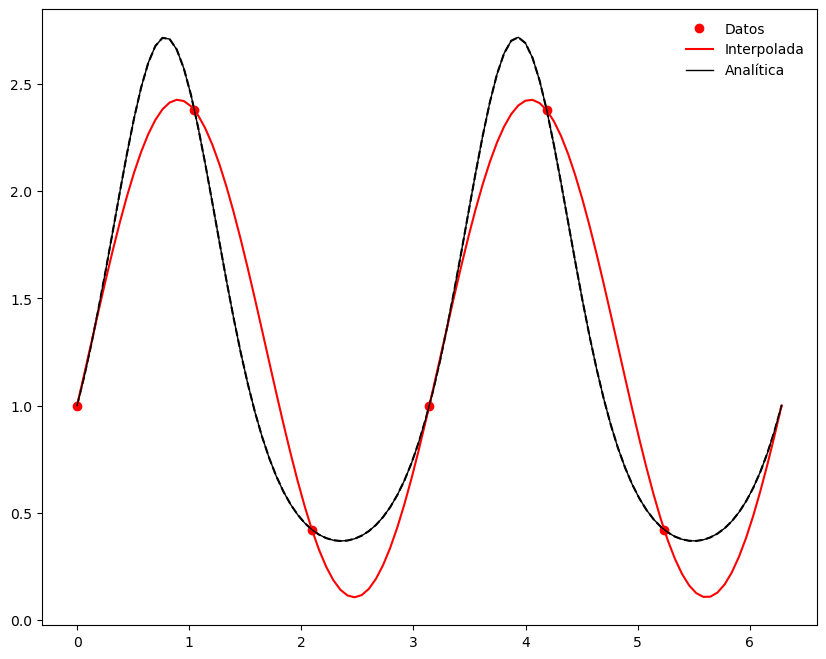

In [30]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 26 datos
n = 6  # 8
dataxs, datays = generatedata(n, func, nodes=" ", int=[0, 2*np.pi], endpoint=False)
aparams, bparams = computeparams(dataxs, datays)

daty = [triginterp(aparams, bparams, i) for i in x]
plt.plot(dataxs, datays, 'ro', label='Datos')
plt.plot(x, daty, c='r', label='Interpolada')
plt.plot(x, func(x), c='k', ls='-', lw=1, label='Analítica')

plt.legend(frameon=False)

`Comentario:` La implementación fue realizada para el caso $n=2m$, es decir, par. Extienda el código para el caso impar (n=2m+1) teniendo presente que en este caso 
<center><img src="capturas/166.png"></center>

Reproduzca el gráfico anterior.

### Transformada discreta de Fourier (DFT)

Como vimos anteriormente podemos expresar la serie de Fourier mediante números complejos. Si tomamos nuestro resultado para el caso par ($n = 2m$) e intentamos expresarlo mediante exponenciales complejas tendremos:
<center><img src="capturas/167.png"></center>

Donde en la cuarta línea se tomó $k \to -k$ y se ajusarón los valores que $k$ puede tomar. También en la última línea se introdujo un nuevo conjunto de parámetros $c_k$, que están relacionados con los parámetros $a_k$ y $b_k$ de la siguiente manera:
<center><img src="capturas/168.png"></center>

donde la elección del label para $c_{-m}$ es arbitraria.

Agrupando la primera expresión en una sola suma, tendremos: 
<center><img src="capturas/169.png"></center>

¿Tenemos $k=0$?

A este punto ya tenemos una nueva versión de la interpolación trigonométrica. Donde usando la metodología anterior podemos calcular $a_k, b_k$ y a partir de este obtener las $c_k$. Sin embargo, pues es poco factible ese procedimiento.

El proceso de obtener las incógnitas $c_k$ puede simplificarse, para ello operemos:
<center><img src="capturas/170.png"></center>

donde se usó el hecho que queremos que se cumpla que $p(x_j)=y_j$, la fórmula de Euler y el hecho que el coseno es una función par ($\cos(-m x_j)=\cos(m x_j)$). Adicionalmente como nuestra malla es equidistante $x_j=2\pi j/m$, tendremos que:
<center><img src="capturas/171.png"></center>

Finalmente se puede llegar a:
<center><img src="capturas/172.png"></center>

lo que no es más que la `transformada de Fourier discreta inversa (DFT inversa)` (porque nos permite recuperar los valores de $y_j$). Ahora, usando el hecho de que las exponenciales complejas son ortogonales, aún para el caso discreto, es decir:
<center><img src="capturas/173.png"></center>

Tendremos que:
<center><img src="capturas/174.png"></center>

Notar que enel último paso seusó la propiedad anterior, y puesto que $k$ y $l$ corren solo desde $-m \to m-1$ la única contribución vendrá del caso  $k=l$, lo que nos lleva a:
<center><img src="capturas/175.png"></center>

A este resultado sele conoce como la `transformada discreta de Fourier (DFT)` y nos permite obtener los valores de $c_k$.

`Ejercicio:`  Usando la DFT, programe un código que realize la interpolación geométrica.

### Versión desplazada

A continuación se presentará una forma (la más usual) en que se re-expresan los resultados anteriores.

Nótese que DFT es expresada en términos de $x_j$, sin embargo estos puntos son equidistantes, lo que nos permite reescribirlo como: 
<center><img src="capturas/176.png"></center>

donde $i, k$ continuan siendo la unidad imaginaria y la frecuencia respectivamente y $j$ el índice espacial. Por otro lado, de la expresion para DFT y su inversa podemos notar que existe una asimetría en los índices $k$ y $j$, es decir, $j$ es no negativa y va desde $0\to n-1$, mientras que $k$ puede ser negativa y positiva (va de $-m \to m-1$). Ahora, usando el resultado anterior, podemos notar que DFT es períodica en $k$ con período $n$, es decir:
<center><img src="capturas/177.png"></center>

donde $e^{-2\pi i j}=\cos(2j\pi)-i\sin(2j\pi) = 1$.

Usando esta simetría podemos definir una nueva versión de los parámetros de Fourier $\tilde{y}_k$ donde ahora $k$ va de $0\to n-1$:
<center><img src="capturas/178.png"></center>

Nótese que ahora no tenemos dependencia de las incógnitas $c_k$, y que podemos calcular las  a partir de los datos equiespaciados. Por otro lado, esta expresión se puede relacionar con la DFT inversa mediante:
<center><img src="capturas/179.png"></center>

Usando  la fórmula de interpolación dada anteriormente:

<center><img src="capturas/169.png"></center>

Y los resultados anteriores se llega a:

<center><img src="capturas/183.png"></center>

`Ejercicio:`  Usando la nueva versión, programe un código que realize la interpolación geométrica.

### Transformada rápida de Fourier (FFT)

Se preguntarán por qué introducir la versión desplazada, el hecho es que el resultado anterior nos permite emplear la FFT. No es nuestro objetivo el deducirla, sin embargo se darán los resultados principales.

La expresión anterior puede expresarse como:
<center><img src="capturas/180.png"></center>

lo que se reduce a un producto matricial 
<center><img src="capturas/181.png"></center>

donde $(E)_{kj}$ es una matriz $n\times n$, con $n$ una potencia de $2$. 

La idea general detrás de FFT es reducir el costo operacional del producto de matrices $O(n^2)$ y para ello utiliza ciertas propiedades que cumple la matriz $E$. Lo que nos permite expresar (para detalles consultar la sección 6.4 de Numerical Method in Physics):
<center><img src="capturas/182.png"></center>

donde los super-indices indican si el índice del dato es par o impar. Esta expresión se conoce como transformada rápida de Fourier (FFT) y nos permite calcular de forma rápida la transformada discreta de Fourier.

In [10]:
# Implementación usando FFT

def fft(ys):
      n = ys.size
      m = n//2
      if n==1:
          ytils = ys
      else:
          evens = fft(ys[::2])  # notar que se llama recurrentemente
          odds = fft(ys[1::2])
          coeffs = np.exp(-2*np.pi*np.arange(m)*1j/n)
          first = evens + coeffs*odds
          second = evens - coeffs*odds
          ytils = np.concatenate((first, second))
      return ytils

def fftinterp(ytils, x):
      n = ytils.size
      m = n//2
      val = ytils[:m]@np.exp(np.arange(m)*x*1j)
      val += ytils[m]*np.cos(m*x)
      val += ytils[m+1:]@np.exp(np.arange(-m+1,0)*x*1j)
      return val/n

In [11]:
# ejemplo
func = lambda x: np.exp(np.sin(2*x))

n = 8  # debe ser múltiplo de 2
dataxs, datays = generatedata(n, func, nodes=" ", int=[0, 2*np.pi], endpoint=False)
ytils = fft(datays)
x = 0.3
pofx = fftinterp(ytils, x)
print(x, pofx, func(x))

0.3 (1.8367140864577467+0j) 1.7588188457669927


/Users/armando/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/armando/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


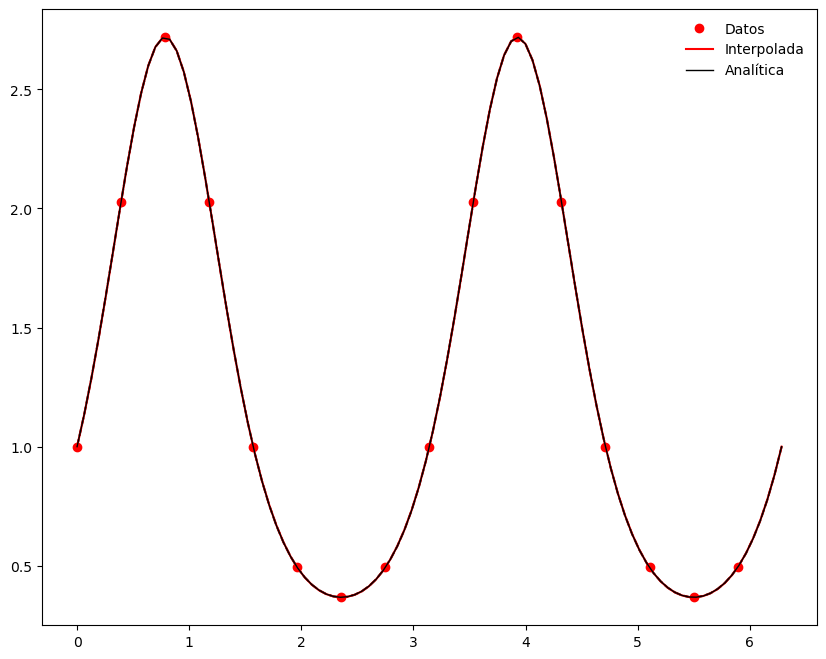

In [16]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 16 datos
n = 16  #
dataxs, datays = generatedata(n, func, nodes=" ", int=[0, 2*np.pi], endpoint=False)
ytils = fft(datays)

daty = [fftinterp(ytils, i) for i in x]
plt.plot(dataxs, datays, 'ro', label='Datos')
plt.plot(x, daty, c='r', label='Interpolada')
plt.plot(x, func(x), c='k', ls='-', lw=1, label='Analítica')

plt.legend(frameon=False)

## Librería `Scipy`

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange

In [ ]:
# data
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)  # regresa una función lambda

y_hat = f(1.5)
print(y_hat)